# Bin Packing Lab

- Authors:
  - Sevhena Walker, walkes31@mcmaster.ca
  - , email
- Group ID on Avenue: group 52
- Gitlab URL:

## How to use the provided code?

_(this section is just here for information, you can get rid of it in your own report)_

In [1]:
from macpacking.reader import DatasetReader, BinppReader, JburkardtReader
from macpacking.model  import Online, Offline
import macpacking.algorithms.offline as offline

0


Now that the business code is imported, we can load an existing dataset

In [2]:
dataset_c = '_datasets/jburkardt/p04_c.txt'
dataset_s = '_datasets/jburkardt/p04_s.txt'
dataset_w = '_datasets/jburkardt/p04_w.txt'
reader: DatasetReader = JburkardtReader(dataset_c, dataset_s, dataset_w)
print(f'Dataset: {dataset_c}')
print(f'Dataset: {dataset_s}')
print(f'Dataset: {dataset_w}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Dataset: _datasets/jburkardt/p04_c.txt
Dataset: _datasets/jburkardt/p04_s.txt
Dataset: _datasets/jburkardt/p04_w.txt
  - Bin Capacity: 524
  - Objects to pack: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 46, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85, 85, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 442]


In [3]:
# dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
# reader: DatasetReader = BinppReader(dataset)
# print(f'Dataset: {dataset}')
# print(f'  - Bin Capacity: {reader.offline()[0]}')
# print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

In [4]:
# dataset = '_datasets/binpp-hard/HARD0.BPP.txt'
# reader: DatasetReader = BinppReader(dataset)
# print(f'Dataset: {dataset}')
# print(f'  - Bin Capacity: {reader.offline()[0]}')
# print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Acording to the `oracle.xslx` file, we now that the optimal solution for this case is to use _31_ bins. Let's call the baseline algorithm, which is an offline one, and see how it performs.

In [5]:
import macpacking.algorithms.baseline as baseline
strategy: Offline = baseline.BenMaier()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 29
[[37, 37, 37, 37], [84, 84, 84, 84, 37, 37, 37, 37, 37], [106, 85, 84, 84, 84, 37, 37], [106, 106, 106, 106, 85, 10], [106, 106, 106, 106, 85, 10], [106, 106, 106, 106, 85, 10], [106, 106, 106, 106, 85, 10], [106, 106, 106, 106, 85, 12], [106, 106, 106, 106, 85, 12], [127, 127, 106, 106, 46, 12], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [252, 127, 127, 10], [252, 252], [252, 252], [252, 252, 9], [252, 252, 9, 9], [252, 252, 9, 9], [252, 252, 9, 9], [252, 252, 9, 9], [252, 252, 10, 9], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [442, 37, 37]]


So the baseline finds the optimal solution. That's good news! Let's call our very own version of `NextFit`, as an offline algorithm.

In [6]:
import macpacking.algorithms.online as online
strategy: Offline = offline.NextFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [84, 84, 84, 84, 46, 37, 37, 37], [85, 85, 85, 84, 84, 84], [106, 85, 85, 85, 85], [106, 106, 106, 106], [106, 106, 106, 106], [106, 106, 106, 106], [106, 106, 106, 106], [106, 106, 106, 106], [106, 106, 106, 106], [127, 127, 106, 106], [127, 127, 127, 127], [127, 127, 127, 127], [127, 127, 127, 127], [127, 127, 127, 127], [127, 127, 127, 127], [127, 127, 127, 127], [252, 127, 127], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [442]]


In [7]:
from macpacking.algorithms.offline import NextFit, BestFitDecreasing, FirstFitDecreasing, WorstFitDecreasing

strategy: Offline = offline.BestFitDecreasing()
result = strategy(reader.offline())

count: int = strategy.counting_compares()
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(count)

nb_bins = 30
[[37], [84, 37], [85, 84, 84, 84, 37, 37, 37, 37, 37], [106, 85, 84, 84, 84, 37, 37], [106, 106, 106, 106, 85, 10], [106, 106, 106, 106, 85, 10], [106, 106, 106, 106, 85, 12], [106, 106, 106, 106, 85, 12], [106, 106, 106, 106, 85, 12], [127, 106, 106, 106, 37, 37], [127, 106, 106, 106, 46], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [252, 127, 127, 10], [252, 252], [252, 252, 9], [252, 252, 9, 9], [252, 252, 9, 9], [252, 252, 9, 9], [252, 252, 9, 9], [252, 252, 10, 9], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [442, 37, 37]]
0


Damn it, this algorithm is 4 bins far from the optimal solution! Let's try an online version. Usually, they perform worst, so let's measure it.

In [8]:
from macpacking.algorithms.online import NextFit, BestFit, FirstFit, WorstFit

strategy: Online = NextFit()


result = strategy(reader.online())
count: int = strategy.counting_compares()
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(count)

nb_bins = 33
[[37, 37, 106, 37, 10, 127], [84, 10, 85, 10, 84, 9, 127, 106], [84, 10, 106, 252], [84, 127, 106], [106, 9, 9, 106, 106, 84, 85], [106, 10, 10, 252, 106, 10], [106, 37, 84, 9, 252, 9], [106, 106, 85, 106, 85], [106, 106, 106], [106, 127, 10, 127, 127], [127, 37, 106, 84, 37, 85, 46], [127, 37, 106, 106, 106], [127, 85, 85, 127, 9], [127, 127, 127, 10, 127], [127, 127, 252], [127, 252, 127, 10], [252, 9, 252], [252, 10, 10, 127, 10], [252, 10, 127, 106, 10], [252, 12, 37], [252, 37], [252, 37, 12, 10], [252, 106, 9], [252, 106, 106], [252, 106, 106], [252, 127], [252, 127], [252, 127, 10, 127], [252, 127, 37, 9], [252, 127, 37, 10], [252, 127, 127], [252, 252, 12], [442, 37, 9]]
138


In [9]:
strategy: Online = online.BestFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 30
[[84, 127, 85, 127, 37, 37, 9, 9, 9], [106, 106, 106, 106, 85, 10], [106, 127], [106, 127, 127, 127], [106, 127, 127, 127, 37], [106, 127, 252, 37], [106, 252, 106, 10, 12, 37], [106, 252, 106, 10, 37, 10], [106, 252, 127], [127, 85, 84, 127, 85, 9], [127, 106, 84, 37, 85, 46, 9, 12, 10], [127, 106, 106, 84, 85, 10], [127, 252, 106], [127, 252, 127, 10], [127, 252, 127, 10], [252], [252, 84, 9, 9, 37, 37, 37, 10, 37, 10], [252, 84, 85, 84, 12], [252, 106, 9, 9, 106, 37], [252, 106, 106], [252, 106, 106], [252, 106, 106], [252, 106, 127, 10, 10, 10, 9], [252, 106, 127, 37], [252, 127, 127, 10], [252, 127, 127, 10], [252, 127, 127, 10], [252, 252], [252, 252, 10, 10], [442]]


As expected, the online version is worst!

## T1: Understand The Code Base

#### Solid Principles
S - In terms of how the code follows the single-responsability principle, each class and function serves one purpose.

O - The design follows the open/closed principle as more components can be added to the code without modifying existing components. This is easily seen in the bin packer design where you have different types of bin packers (offline, online) and there could possibly be more in the future if such a thing was wanted.

L - The design follows the Liskov Substituion principle since all dependent classes can be used in place of their superclasses without any erors occuring. Any overrides seen in the algorithms for the offline and online binpackers do not make any significant changes.

I - This design clearly follows interface segragation by the use of the BinPacker interface. This allows for the initalizing of different types of bin packers (offline, online) that still follow the same baseline.

D - In the code design there are multiple classes that depend on abstract classes (BinppReader depends on DatasetReader, NextFit has two versions that each depend on an online and offline version of the Binpacker interface) Any changes made to these subclasses won't affect the superclass. If any changes need to be made to any of the methods of the superclasse, then there only need to be an override method initialized in the subclass.

#### Dataset Comprehension

The files found in the prefixed *binpp* folders follow the same format. The first line in each file gives the number *n* of weighted items in the file. The second line gives the max capacity *c* of the bins and the rest of the file is simply the n individual items listed by their respective weights.

The files in the *jburkardt* come in triples with a file ending in *_c*, *_s* and *_w*. The *_c* file gives the capacity of the bins, the *_s* file matches up with the *_w* file as they have the same number of data values. Each line of the *_s* file says how many items of the weight in the *_w* are to be packed. 

## T2: Implement And Benchmark Algorithms

In [10]:
from pyperf import BenchmarkSuite
from os.path import exists

bench_datafile = 'outputs/bench.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

In [11]:
def extract_benchmark_algos(file: str) -> set[str]:
    suite = BenchmarkSuite.load(file)
    context = suite.get_benchmark_names()
    return set(map(lambda c: c.split('-')[0], context))

In [12]:
files = extract_benchmark_algos(bench_datafile)
print(files)

{'p04 offline WFDesc', 'p02 offline FFDesc', 'p03 offline BFDesc', 'p01 offline NF_Off', 'p03 offline WFDesc', 'p04 offline FFDesc', 'p04 offline BFDesc', 'p01 offline FFDesc', 'p02 offline BFDesc', 'p01 offline BFDesc', 'p03 offline FFDesc', 'p01 offline WFDesc', 'p03 offline NF_Off', 'p02 offline NF_Off', 'p04 offline NF_Off', 'p02 offline WFDesc'}


In [13]:
def load_bench_measurements(name: str, json_filename: str) -> list[float]:
    """extract the values for a given benchmark"""
    suite = BenchmarkSuite.load(json_filename)
    bench = suite.get_benchmark(name)
    return list(bench.get_values())

In [14]:
Next_Fit_off_vals = []; Next_Fit_on_vals = []
First_Fit_off_vals = []; First_Fit_on_vals = []
Best_Fit_off_vals = []; Best_Fit_on_vals = []
Worst_Fit_off_vals = []; Worst_Fit_on_vals = []

for file in files:
    match file.split()[2]:
        case 'NF_Off':
            Next_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'NF_On':
            Next_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'FFDesc':
            First_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'FF':
            First_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'BFDesc':
            Best_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'BF':
            Best_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'WFDesc':
            Worst_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'WF':
            Worst_Fit_on_vals += load_bench_measurements(file, bench_datafile)

#print(Next_Fit_off_vals)
print(Best_Fit_off_vals)

[4.0808154295746135e-05, 4.341149903552832e-05, 4.4619140624035936e-05, 4.0943164052009706e-05, 4.236884765873583e-05, 4.697880859794168e-05, 4.035913084976528e-05, 4.197780761217018e-05, 4.22633544872042e-05, 4.5182763670936765e-05, 4.337841797052988e-05, 4.455141602477397e-05, 4.513908690739754e-05, 4.628225097746963e-05, 4.54800781284348e-05, 4.5990454097477595e-05, 4.697373046269604e-05, 4.064885253285411e-05, 4.196005858148055e-05, 4.292841796882385e-05, 4.064360351208052e-05, 4.0934863278607736e-05, 4.15649414122754e-05, 4.074826659916653e-05, 4.295219726202504e-05, 4.688676757780286e-05, 5.0104443346299377e-05, 4.084003906257294e-05, 4.3313647466902694e-05, 4.2113037110880214e-05, 4.0956689460358575e-05, 4.161384276812896e-05, 4.279279785635026e-05, 4.668134765495324e-05, 4.492998046146113e-05, 4.416186523314991e-05, 4.13842041098178e-05, 4.692507323511563e-05, 4.696975098283929e-05, 4.5003393566389605e-05, 4.4650097649423515e-05, 4.127292480404776e-05, 4.448637695020352e-05, 4.

In [15]:
from matplotlib import pyplot as plt

def draw_hist(values: list[float], title: str, canvas):
    canvas.set_title(title)
    canvas.set(xlabel='exec time (s)', ylabel='|instances|')
    canvas.hist(values, 20) # putting values into 10 beans

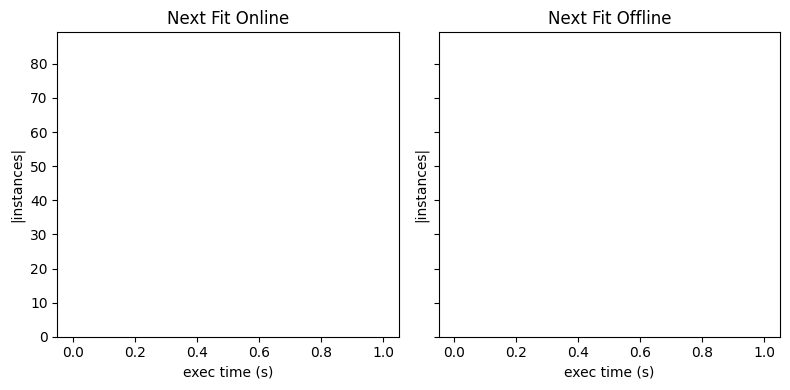

In [16]:
fig, axes = plt.subplots(1,2, sharex = True, sharey= True)
draw_hist(Next_Fit_off_vals, "Next Fit Online", axes[0]) 
draw_hist(Next_Fit_on_vals, "Next Fit Offline", axes[1]) 
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig('outputs/histogram_NF.pdf')

In [20]:
def plot_box(values: list[float], names: str, canvas):
    canvas.boxplot(values, notch=True, labels=names)

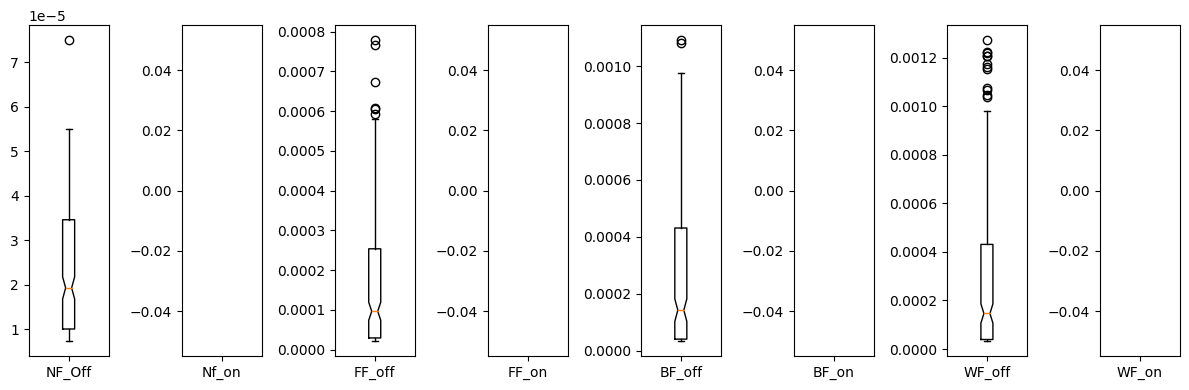

In [21]:
fig, ax = plt.subplots(1,8)

plot_box([Next_Fit_off_vals],['NF_Off'], ax[0])
plot_box([Next_Fit_on_vals],['Nf_on'], ax[1])
plot_box([First_Fit_off_vals],['FF_off'], ax[2])
plot_box([First_Fit_on_vals],['FF_on'], ax[3])
plot_box([Best_Fit_off_vals],['BF_off'], ax[4])
plot_box([Best_Fit_on_vals],['BF_on'], ax[5])
plot_box([Worst_Fit_off_vals],['WF_off'], ax[6])
plot_box([Worst_Fit_on_vals],['WF_on'], ax[7])

fig.set_size_inches(12,4)
fig.tight_layout()
fig.savefig('outputs/boxplot.pdf')

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

##### *Hassan*
  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

##### *Sevhena*
  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)